In [1]:
from sklearn.model_selection import train_test_split, cross_validate
from utils import load_data

from sklearn import tree
import numpy as np

from tqdm import tqdm

In [2]:
data = load_data()
X, y = data.drop(columns=['subreddit','author','date','post']), data['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Cost Complexity Pruned tree

In [ ]:
dtree = tree.DecisionTreeClassifier(min_samples_leaf=0.02, random_state=0)
dtree = dtree.fit(X_train, y_train)

path = dtree.cost_complexity_pruning_path(X_train, y_train)
path.ccp_alphas


array([0.        , 0.00010197, 0.00010733, 0.00011193, 0.00014461,
       0.00015579, 0.0001686 , 0.00019872, 0.00022684, 0.00030115,
       0.00031469, 0.00032504, 0.00042518, 0.00043889, 0.00046333,
       0.0004745 , 0.0005956 , 0.00073933, 0.00076969, 0.00084525,
       0.00093708, 0.00095454, 0.00125586, 0.00139605, 0.00148151,
       0.00150936, 0.00235312, 0.00262814, 0.00315511, 0.00320498,
       0.00526783, 0.00562276, 0.00567198, 0.00735989, 0.01683974,
       0.01970511, 0.03180406, 0.04138189])

In [4]:
alphas_to_use = path.ccp_alphas

In [6]:
alphas_to_use.shape

(38,)

In [7]:
alphas_to_use

array([0.        , 0.00010197, 0.00010733, 0.00011193, 0.00014461,
       0.00015579, 0.0001686 , 0.00019872, 0.00022684, 0.00030115,
       0.00031469, 0.00032504, 0.00042518, 0.00043889, 0.00046333,
       0.0004745 , 0.0005956 , 0.00073933, 0.00076969, 0.00084525,
       0.00093708, 0.00095454, 0.00125586, 0.00139605, 0.00148151,
       0.00150936, 0.00235312, 0.00262814, 0.00315511, 0.00320498,
       0.00526783, 0.00562276, 0.00567198, 0.00735989, 0.01683974,
       0.01970511, 0.03180406, 0.04138189])

In [8]:
train_scores = []
val_scores = []
for ccp_alpha_i in tqdm(alphas_to_use):
    dtree = tree.DecisionTreeClassifier(ccp_alpha = ccp_alpha_i, random_state=0, min_samples_leaf=0.02)
    scores = cross_validate(dtree, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
    train_scores.append(scores['train_score'].mean())
    val_scores.append(scores['test_score'].mean())

100%|██████████| 38/38 [21:41<00:00, 34.24s/it]


In [9]:
print(train_scores)
print(val_scores)

[np.float64(0.4300546508593353), np.float64(0.4300546508593353), np.float64(0.4300546508593353), np.float64(0.4300546508593353), np.float64(0.4300546508593353), np.float64(0.4300546508593353), np.float64(0.4300504208452705), np.float64(0.43001940074212863), np.float64(0.4299270455493634), np.float64(0.4299270455493634), np.float64(0.4299270455493634), np.float64(0.4299270455493634), np.float64(0.4299270455493634), np.float64(0.4299270455493634), np.float64(0.4298382152540026), np.float64(0.4298382152540026), np.float64(0.42935317398418765), np.float64(0.42935317398418765), np.float64(0.42877789247396675), np.float64(0.42866579710124963), np.float64(0.42774859074142313), np.float64(0.42720855894581744), np.float64(0.42664032705644644), np.float64(0.42582111433256403), np.float64(0.4252155183975016), np.float64(0.4229432958423616), np.float64(0.4168661843860894), np.float64(0.4129456663503669), np.float64(0.4095687051219709), np.float64(0.40841955130103447), np.float64(0.4027950467049822

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy')

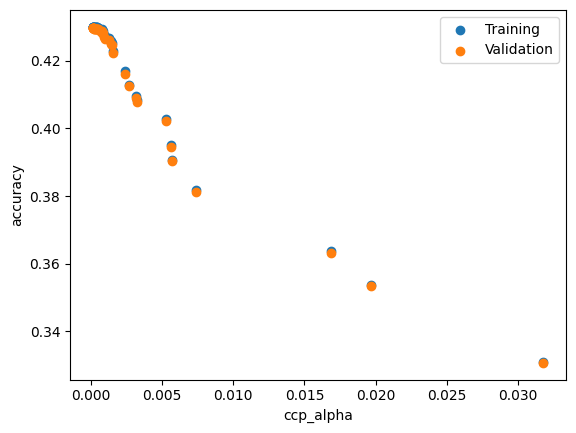

In [11]:
plt.scatter(alphas_to_use[1:-1],  train_scores[1:-1], label='Training')
plt.scatter(alphas_to_use[1:-1],  val_scores[1:-1], label='Validation')
plt.legend()
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')

In [26]:
best_alpha = alphas_to_use[1:-1][np.argmax(val_scores[1:-1])]
best_alpha

np.float64(0.00010197200751532395)

In [28]:
dtree = tree.DecisionTreeClassifier(ccp_alpha = best_alpha, random_state=0, min_samples_leaf=0.02)
dtree = dtree.fit(X_train, y_train)

In [29]:
dtree.score(X_test, y_test)

0.4307383844878346

<Axes: xlabel='subreddit'>

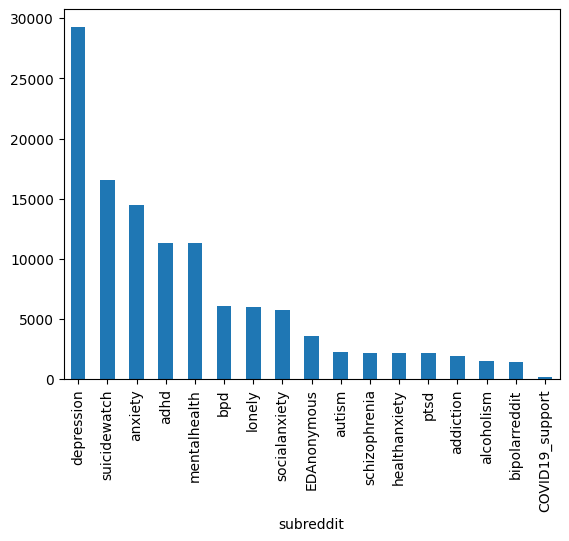

In [31]:
y_test.value_counts().plot(kind='bar')